## Исследование развлекательного приложения Procrastinate Pro+

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Нам предстоит изучить:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

### Шаг 1. Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

visits = pd.read_csv('C:\\Users\\jmilo\\OneDrive\\Рабочий стол\\Яндекс.Практикум\\Приложение Procastinate\\Проект 8\\visits_info_short.csv', parse_dates=['Session Start', 'Session End'])
orders = pd.read_csv('C:\\Users\\jmilo\\OneDrive\\Рабочий стол\\Яндекс.Практикум\\Приложение Procastinate\\Проект 8\\orders_info_short.csv', parse_dates=['Event Dt'])
costs = pd.read_csv('C:\\Users\\jmilo\\OneDrive\\Рабочий стол\\Яндекс.Практикум\\Приложение Procastinate\\Проект 8\\costs_info_short.csv', parse_dates=['dt'])

In [2]:
# Посмотрим содержание и информацию о визитах
display(visits.head())
visits.info()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 non-null  object        
 3   Channel        309901 non-null  object        
 4   Session Start  309901 non-null  datetime64[ns]
 5   Session End    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Пропусков нет. Тип данных в стобцах с датой соответствующий. Необходимо привести названия столбцов к общему виду и проверить дубликаты.

In [3]:
visits = visits.rename(columns=
                      {
                          'User Id': 'uid',
                          'Region': 'region',
                          'Device': 'device',
                          'Channel': 'channel',
                          'Session Start': 'session_start',
                          'Session End': 'session_end'
                      })

In [4]:
# Проверим наличие дубликатов
visits.duplicated().sum()

0

Дубликатов нет

In [5]:
# Посмотрим содержание и информацию о покупках
display(orders.head())
orders.info()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Пропусков нет. Тип данных в стобце с датой соответствующий. Необходимо привести названия столбцов к общему виду и проверить дубликаты.

In [6]:
orders = orders.rename(columns=
                      {
                          'User Id': 'uid',
                          'Event Dt': 'event_dt',
                          'Revenue': 'revenue',
                      })

In [7]:
# Проверим наличие дубликатов
orders.duplicated().sum()

0

Дубликатов нет

In [8]:
# Посмотрим содержание и информацию о рекламных расходах
display(costs.head())
costs.info()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   Channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


Пропусков нет. Тип данных в стобце с датой соответствующий. Необходимо привести названия столбцов к общему виду и проверить дубликаты.

In [9]:
costs = costs.rename(columns={'Channel': 'channel'})

In [10]:
# Проверим наличие дубликатов
costs.duplicated().sum()

0

Дубликатов нет

**ВЫВОД:** выгрузили данные и ознакомились с ними. Привели столбцы с датой к соответствующему типу при выгрузке. Переименовали столбцы, проверили наличие пропусков и дубликатов.

### Шаг 2. Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

**Функция для создания пользовательских профилей**

In [11]:
# функция для создания пользовательских профилей

def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['uid', 'session_start'])
        .groupby('uid')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date.astype('datetime64')
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['uid'].isin(orders['uid'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'uid': 'nunique'})
        .rename(columns={'uid': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

**Функция для расчета Retention Rate**

In [12]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['uid', 'session_start']], on='uid', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='uid', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'uid': 'nunique'})
            .rename(columns={'uid': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

**Функция для расчета конверсии**

In [13]:
def get_conversion(
    profiles,
    orders,  
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):



    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Найти дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['uid', 'event_dt'])
        .groupby('uid')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # Шаг 3. Добавить данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['uid', 'event_dt']], on='uid', how='left'
    )

    # Шаг 4. Рассчитать лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 5. Построить таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='uid', aggfunc='nunique'
        )

        # Шаг 6. Посчитать сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)

        # Шаг 7. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'uid': 'nunique'})
            .rename(columns={'uid': 'cohort_size'})
        )

        # Шаг 8. Объединить таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 9. Разделить каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)

        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция для подсчета LTV**

In [14]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['uid', 'event_dt', 'revenue']], on='uid', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'uid': 'nunique'})
            .rename(columns={'uid': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['uid', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

**Функция для сглаживания данных**

In [15]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

**Функция для построения графика Retention Rate**

In [16]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

**Функция для визуализации конверсии**

In [17]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Функция для визуализации LTV и ROI**

In [18]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Шаг 3. Исследовательский анализ данных

**Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.**

In [19]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,uid,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [20]:
# Определим минимальную дату привлечения
print(profiles['dt'].min())

2019-05-01 00:00:00


In [21]:
# Определим максимальную дату привлечения
print(profiles['dt'].max())

2019-10-27 00:00:00


**Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.**

In [22]:
print(
    profiles.groupby('region')
    .agg({'uid': 'nunique',
          'payer': 'mean'})
    .sort_values(by='payer', ascending=False)
)

                  uid     payer
region                         
United States  100002  0.069019
Germany         14981  0.041119
UK              17575  0.039829
France          17450  0.037994


Больше всего пользователей из США, а также большая доля платящих пользователей.

**Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.**

In [23]:
print(
    profiles.groupby('device')
    .agg({'uid': 'nunique',
          'payer': 'mean'})
    .sort_values(by=['payer', 'uid'], ascending=False)
)

           uid     payer
device                  
Mac      30042  0.063644
iPhone   54479  0.062079
Android  35032  0.058518
PC       30455  0.050468


Чаще всего пользователи пользуются мобильными устройствами iPhone, на втором месте мобильные устройства на Android. Но при этом, большая часть платящих пользователей используют Mac, что не удивительно - как правило, техника Apple стоит дороже других устройств, следовательно ею владеют более обеспеченные люди, они же чаще тратят деньги в приложении.

**Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.**

In [24]:
print(
    profiles.groupby('channel')
    .agg({'uid': 'nunique',
          'payer': 'mean'})
    .sort_values(by=['payer', 'uid'], ascending=False)
)

                      uid     payer
channel                            
FaceBoom            29144  0.122049
AdNonSense           3880  0.113402
lambdaMediaAds       2149  0.104700
TipTop              19561  0.096007
RocketSuperAds       4448  0.079137
WahooNetBanner       8553  0.052964
YRabbit              4312  0.038265
MediaTornado         4364  0.035747
LeapBob              8553  0.030633
OppleCreativeMedia   8605  0.027077
organic             56439  0.020553


Больше всего в приложение пришло "органических" пользователей, но среди них самая маленькая доля платящих. Также большое количество пришло из FaceBoom(29144) и TipTop(19561). Самая большая доля платящих пользователей пришла благодаря всё тому же FaceBoom. 

**ВЫВОД:** исследуемые данные за период с 01 мая 2019 по 27 октября 2019. Больше всего пользователей из США (а также среди них самая большая доля платящих), чаще всего люди заходят через iPhone - больше всего платящих пользователей пользуются техникой Apple. Самое большое количество пользователей пришло в приложение самостоятельно, но среди них самая маленькая доля платящих. Самым полезным на данном этапе можно назвать канал FaceBoom - на него приходится самая большая доля платящих пользователей, а также он находится на втором месте по количеству привлеченных пользователей.

### Шаг 4. Маркетинг

In [25]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


**Посчитаем общую сумму расходов на маркетинг**

In [26]:
print(costs['costs'].sum())

105497.30000000002


**Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник**

In [27]:
print(
    costs.groupby('channel')
    .agg({'costs': 'sum'})
    .sort_values(by='costs', ascending=False)
)

                       costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22


Больше всего было потрачено денег на каналы TipTop и FaceBoom, меньше всего MediaTornado и YRabbit.

**Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику**

In [28]:
# Добавим в таблицу с рекламными расходами новые столбцы
costs['week'] = costs['dt'].astype('datetime64[W]') # выделим недели
costs['month'] = costs['dt'].astype('datetime64[M]') # выделим месяца
costs

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,2019-04-25,2019-05-01
1,2019-05-02,FaceBoom,78.1,2019-05-02,2019-05-01
2,2019-05-03,FaceBoom,85.8,2019-05-02,2019-05-01
3,2019-05-04,FaceBoom,136.4,2019-05-02,2019-05-01
4,2019-05-05,FaceBoom,122.1,2019-05-02,2019-05-01
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,2019-10-17,2019-10-01
1796,2019-10-24,lambdaMediaAds,6.4,2019-10-24,2019-10-01
1797,2019-10-25,lambdaMediaAds,8.8,2019-10-24,2019-10-01
1798,2019-10-26,lambdaMediaAds,8.8,2019-10-24,2019-10-01


In [29]:
# Подготовим сводную таблицу по неделям
costs_week = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
costs_week.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
week,,,,,,,,,,
2019-04-25,40.95,113.3,2.52,6.24,4.25,21.060,80.0,10.8,8.1,17.6
2019-05-02,281.40,742.5,27.09,57.60,34.75,136.890,479.0,73.8,76.5,105.6
2019-05-09,259.35,728.2,29.61,59.76,31.00,131.625,451.0,93.0,74.1,98.4
2019-05-16,275.10,760.1,28.98,58.80,31.00,142.155,572.6,85.8,66.6,101.6
2019-05-23,277.20,788.7,30.45,46.56,44.00,122.850,993.7,95.4,60.0,116.0


In [30]:
# Подготовим сводную таблицу по месяцам
costs_month = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
costs_month.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month,,,,,,,,,,
2019-05-01,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
2019-06-01,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
2019-07-01,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
2019-08-01,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
2019-09-01,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2


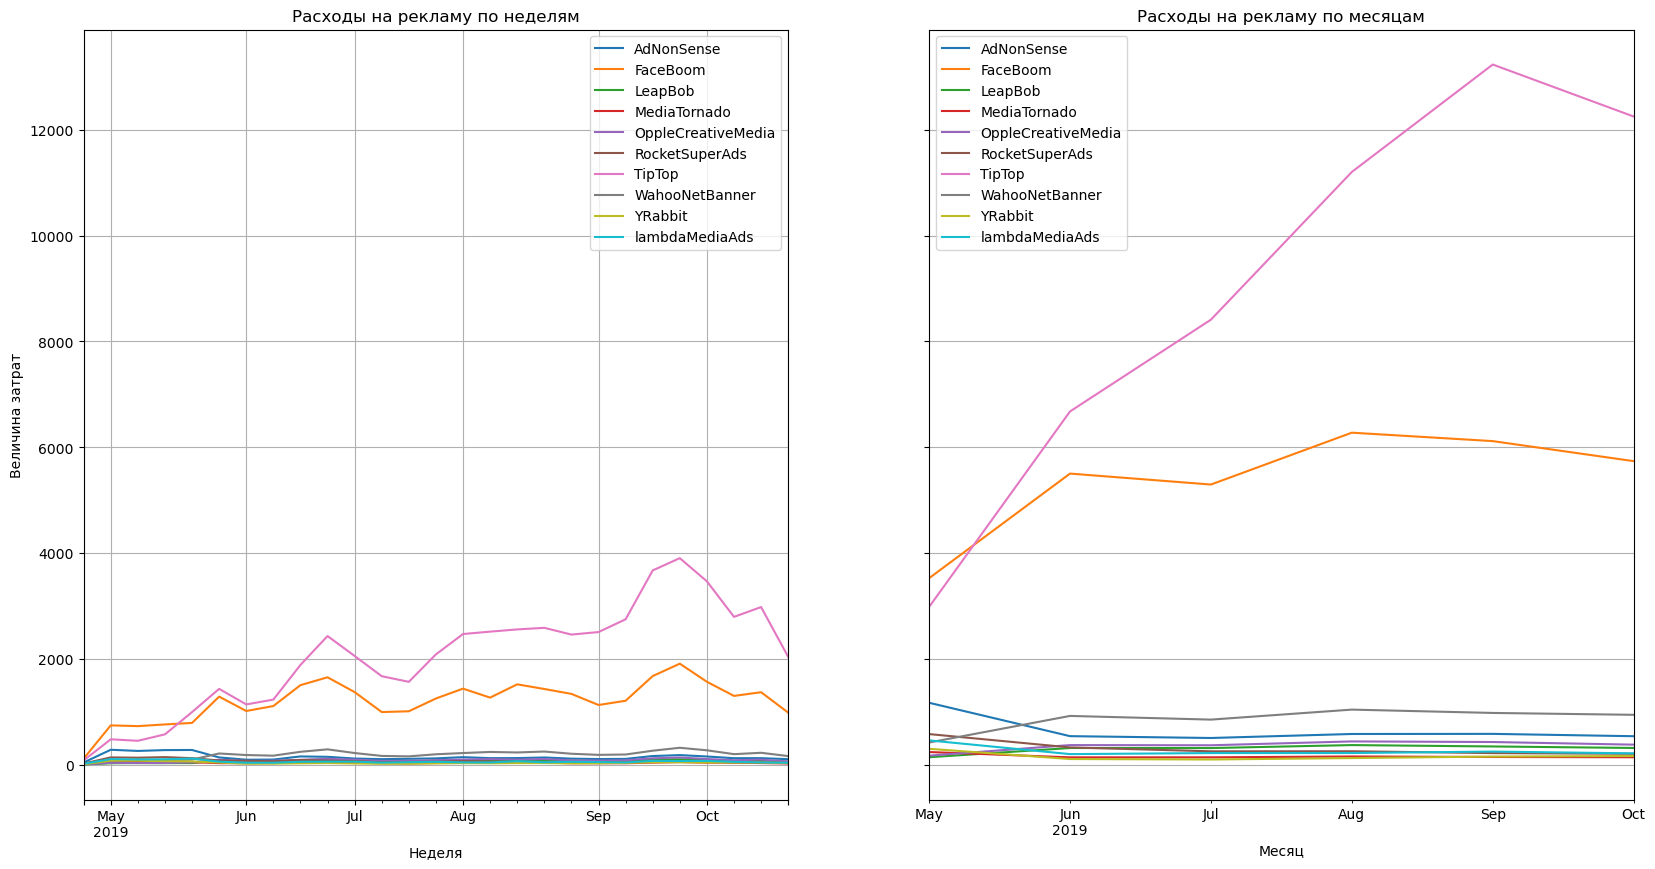

In [31]:
# Построим графики
plt.figure(figsize=(20, 10))
ax1 = plt.subplot(1, 2, 1)
costs_week.plot(grid=True, title='Расходы на рекламу по неделям', ax=ax1)
plt.legend()
plt.xlabel('Неделя')
plt.ylabel('Величина затрат')


ax2 = plt.subplot(1, 2, 2, sharey=ax1)
costs_month.plot(grid=True, title='Расходы на рекламу по месяцам', ax=ax2)
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Величина затрат')
plt.show()

**Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника**

In [32]:
# Посмотрим среднюю стоимость привлечения по каналам
profiles.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='mean'
).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


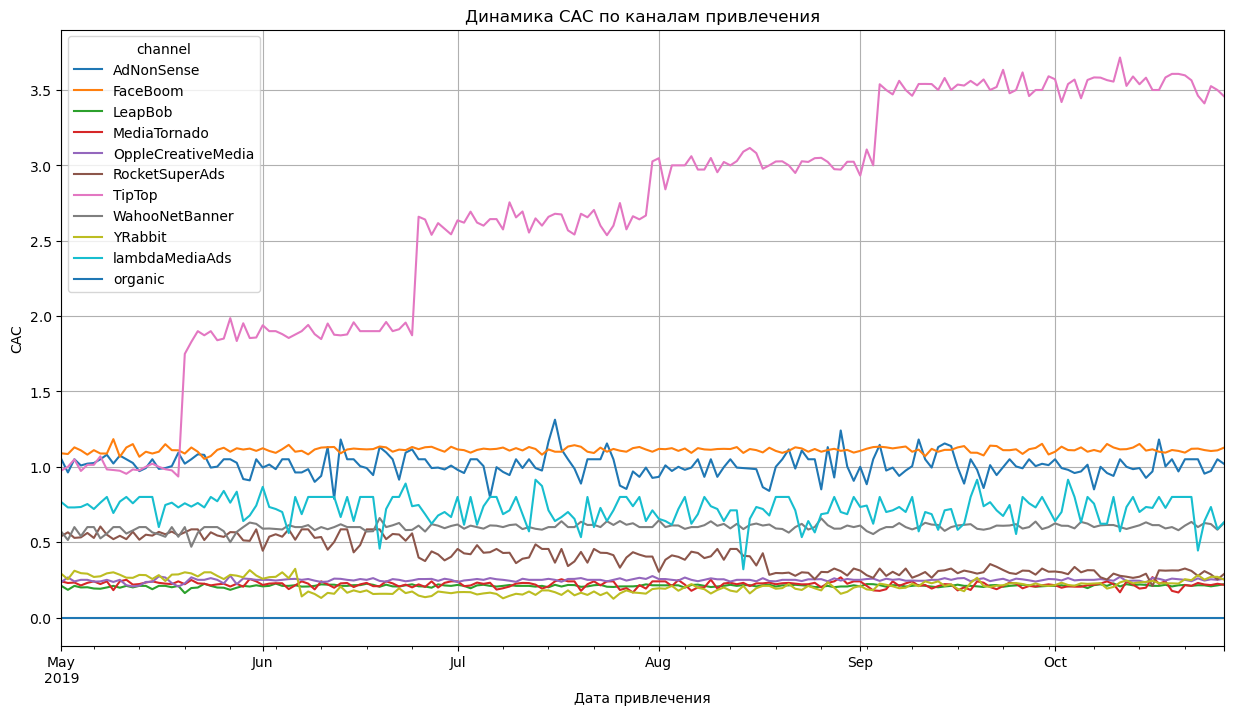

In [33]:
# Построим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 8))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

**ВЫВОД:** всего на рекламу потрачено 105497,3. Больше половины инвестиций тратится на канал TipTop, у него же самая высокая стоимость привлечения пользователей. На графиках видно, что с ежемесячным увеличением расходов на TipTop, так же ежемесячно растет CAC.

## Шаг 5. Оценим окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Будем считать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

**Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI**

In [34]:
observation_date = datetime(2019, 11, 1).date()  # зададим момент анализа 
horizon_days = 14  # зададим горизонт анализа 
profiles_not_organic = profiles.query('channel != "organic"')

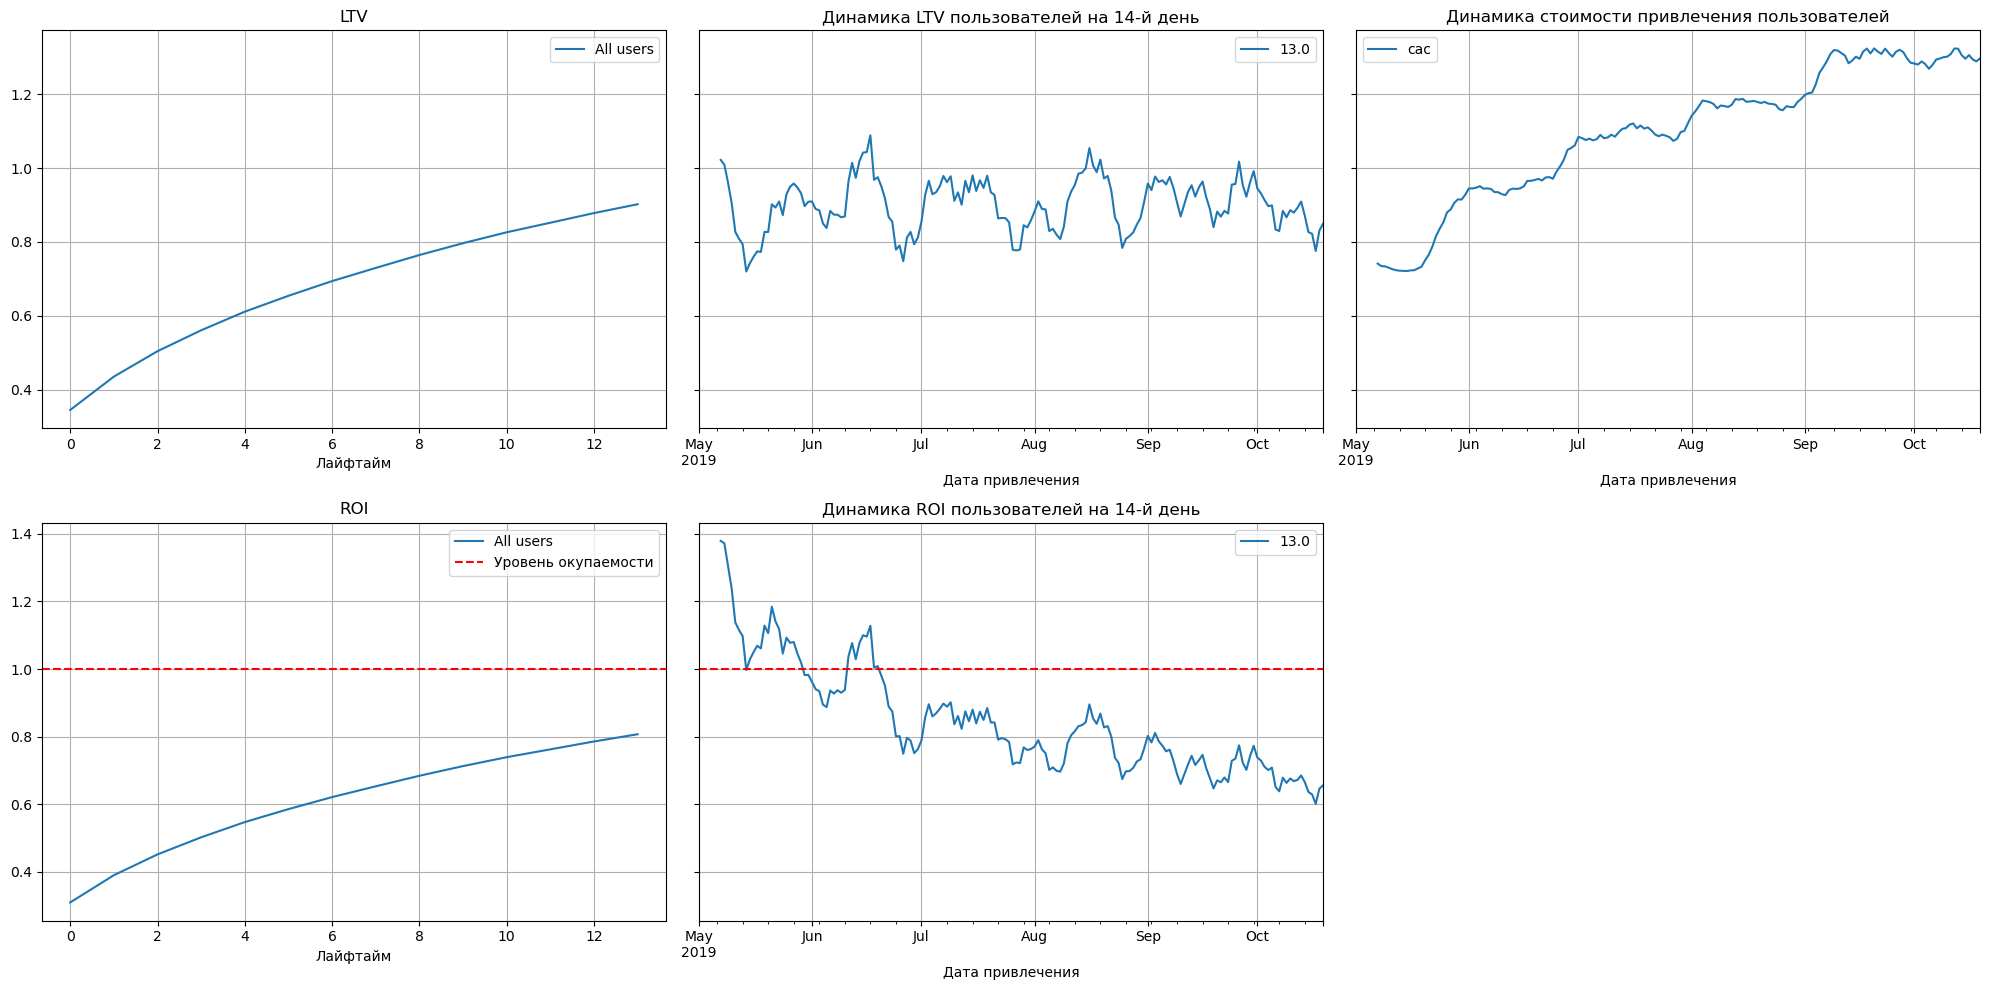

In [35]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Вывод: реклама не окупается, ROI к концу второй недели около 80%. САС резко возрастает в начале июня, но при этом ROI резко падает. LTV стабилен, следовательно дело не в ухудшении качества пользователей.

**Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей**

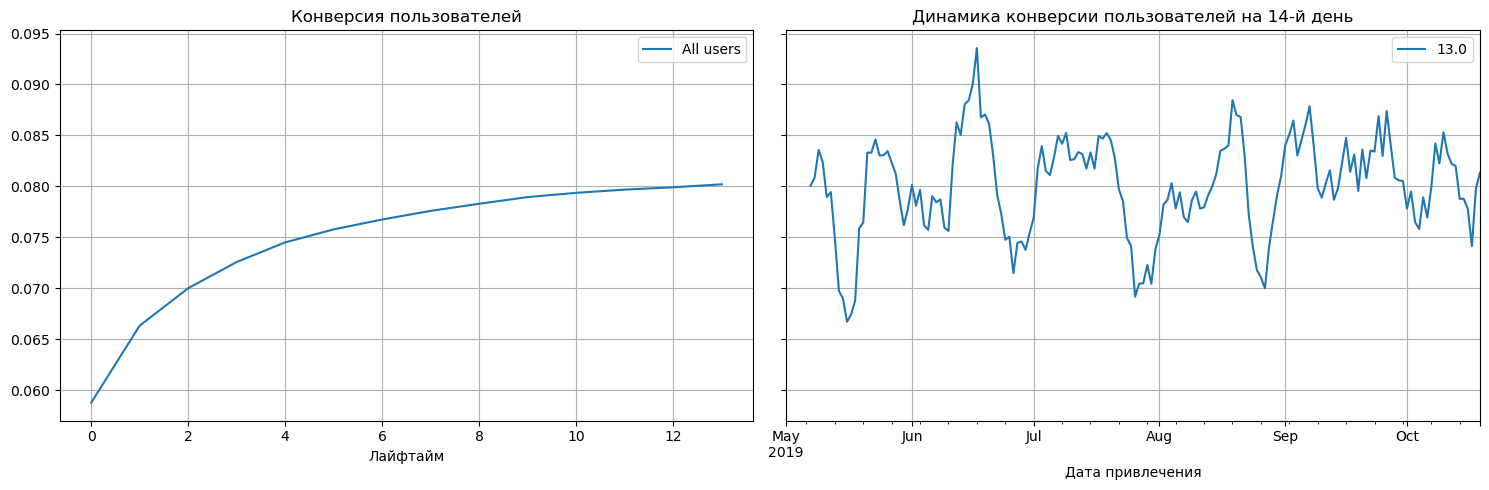

In [36]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Судя по графику, конверсия пользователей постоянно растет.

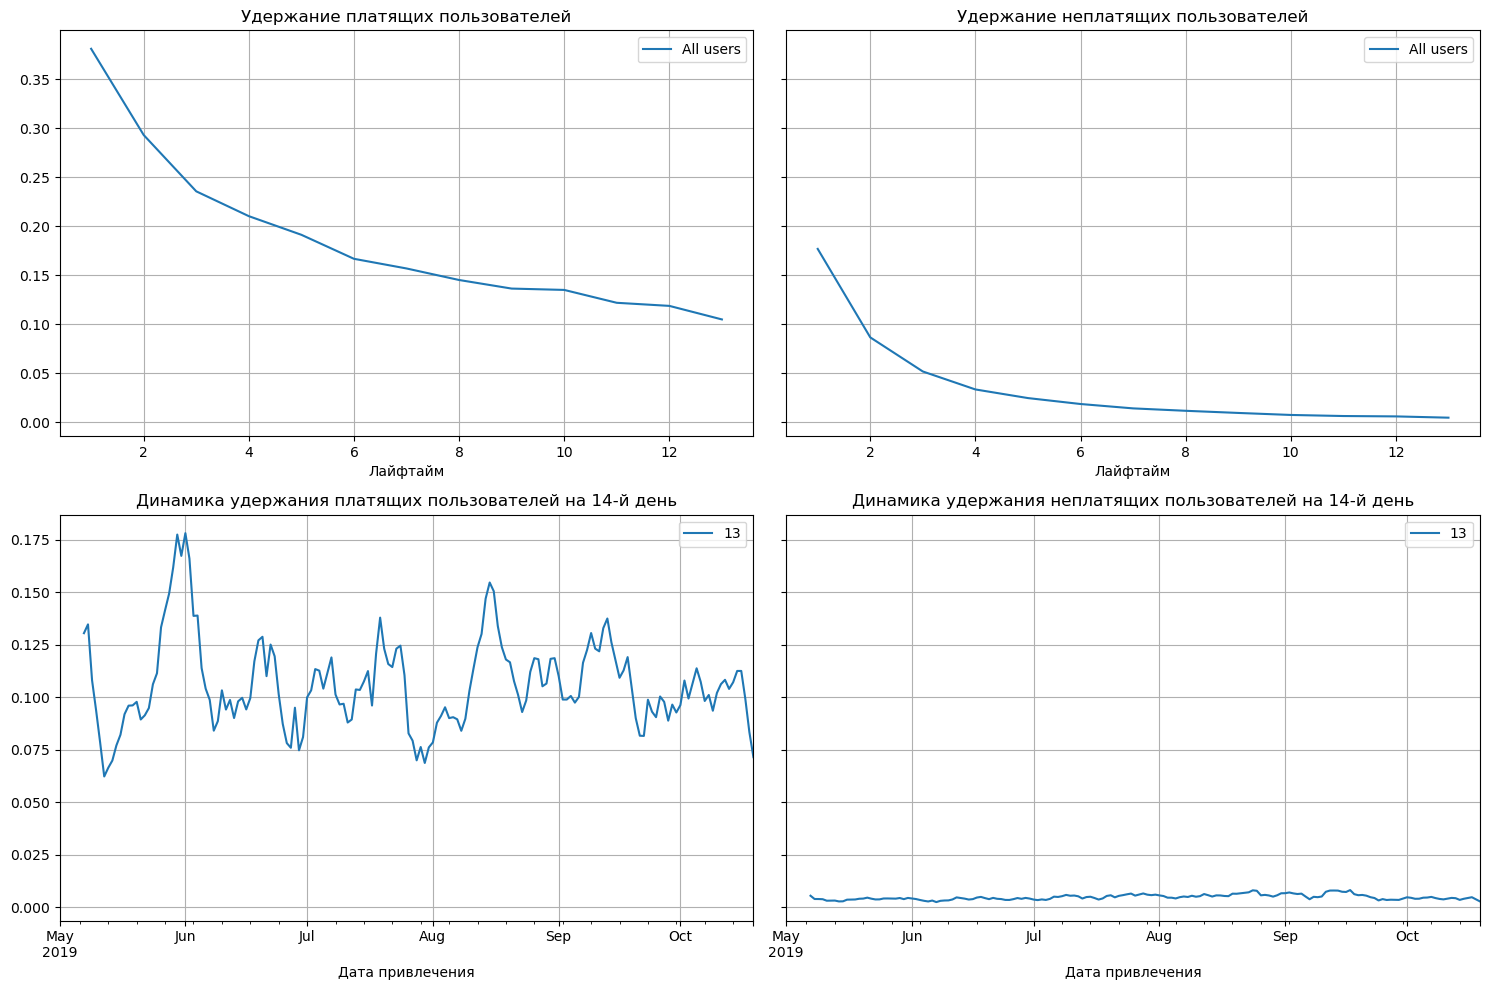

In [37]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователей, как и положено, выше неплатящих. В первый день удержание около 40%. Исходя из графика динамики удержания платящих пользователей, можно сказать, что в среднем к концу втрой недели удержание пользователей 10%, максимальное значение удержания было в июне. Неплатящие пользователи, соответственно, не удерживаются.

**Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI**

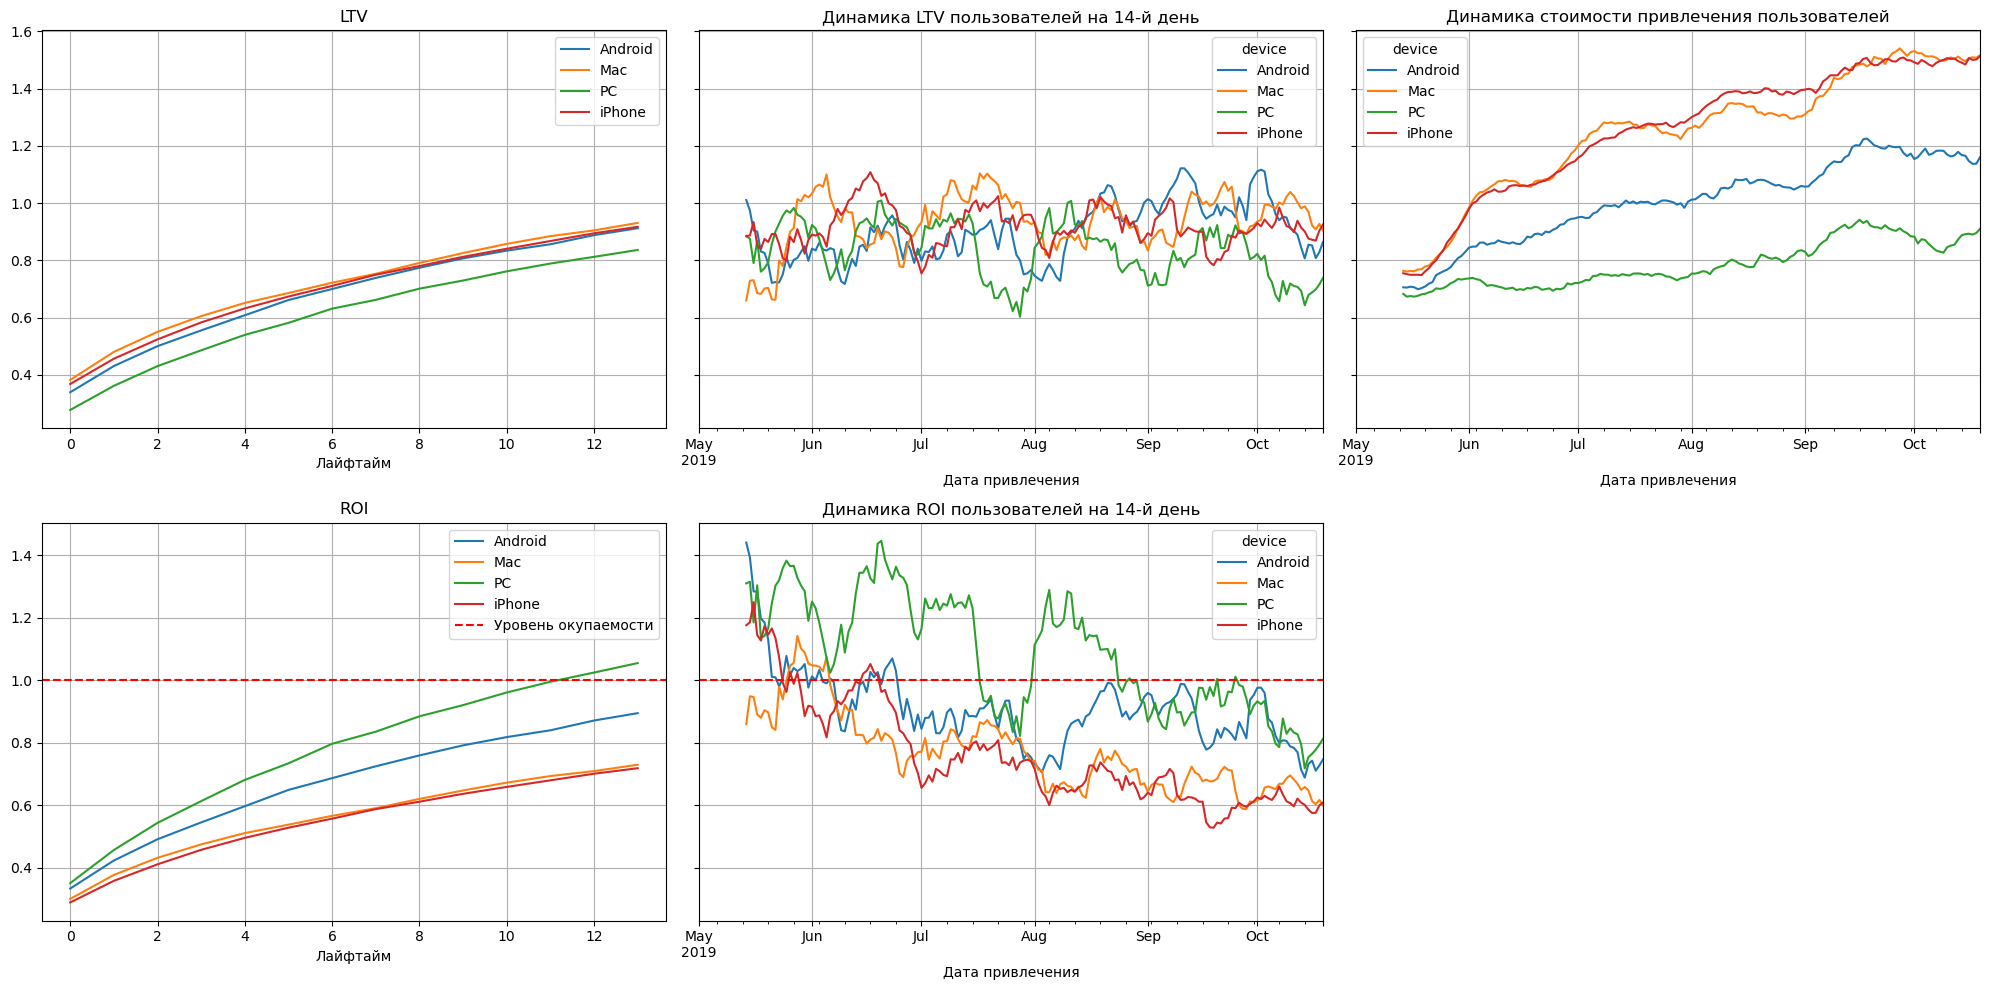

In [38]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=['device']
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Как видно из графиков, окупаются только пользователи PC, при этом затраты на привлечение наименьшие. Стоимость привлечения пользователей iPhone и Mac выше, чем остальных. 

**Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI**

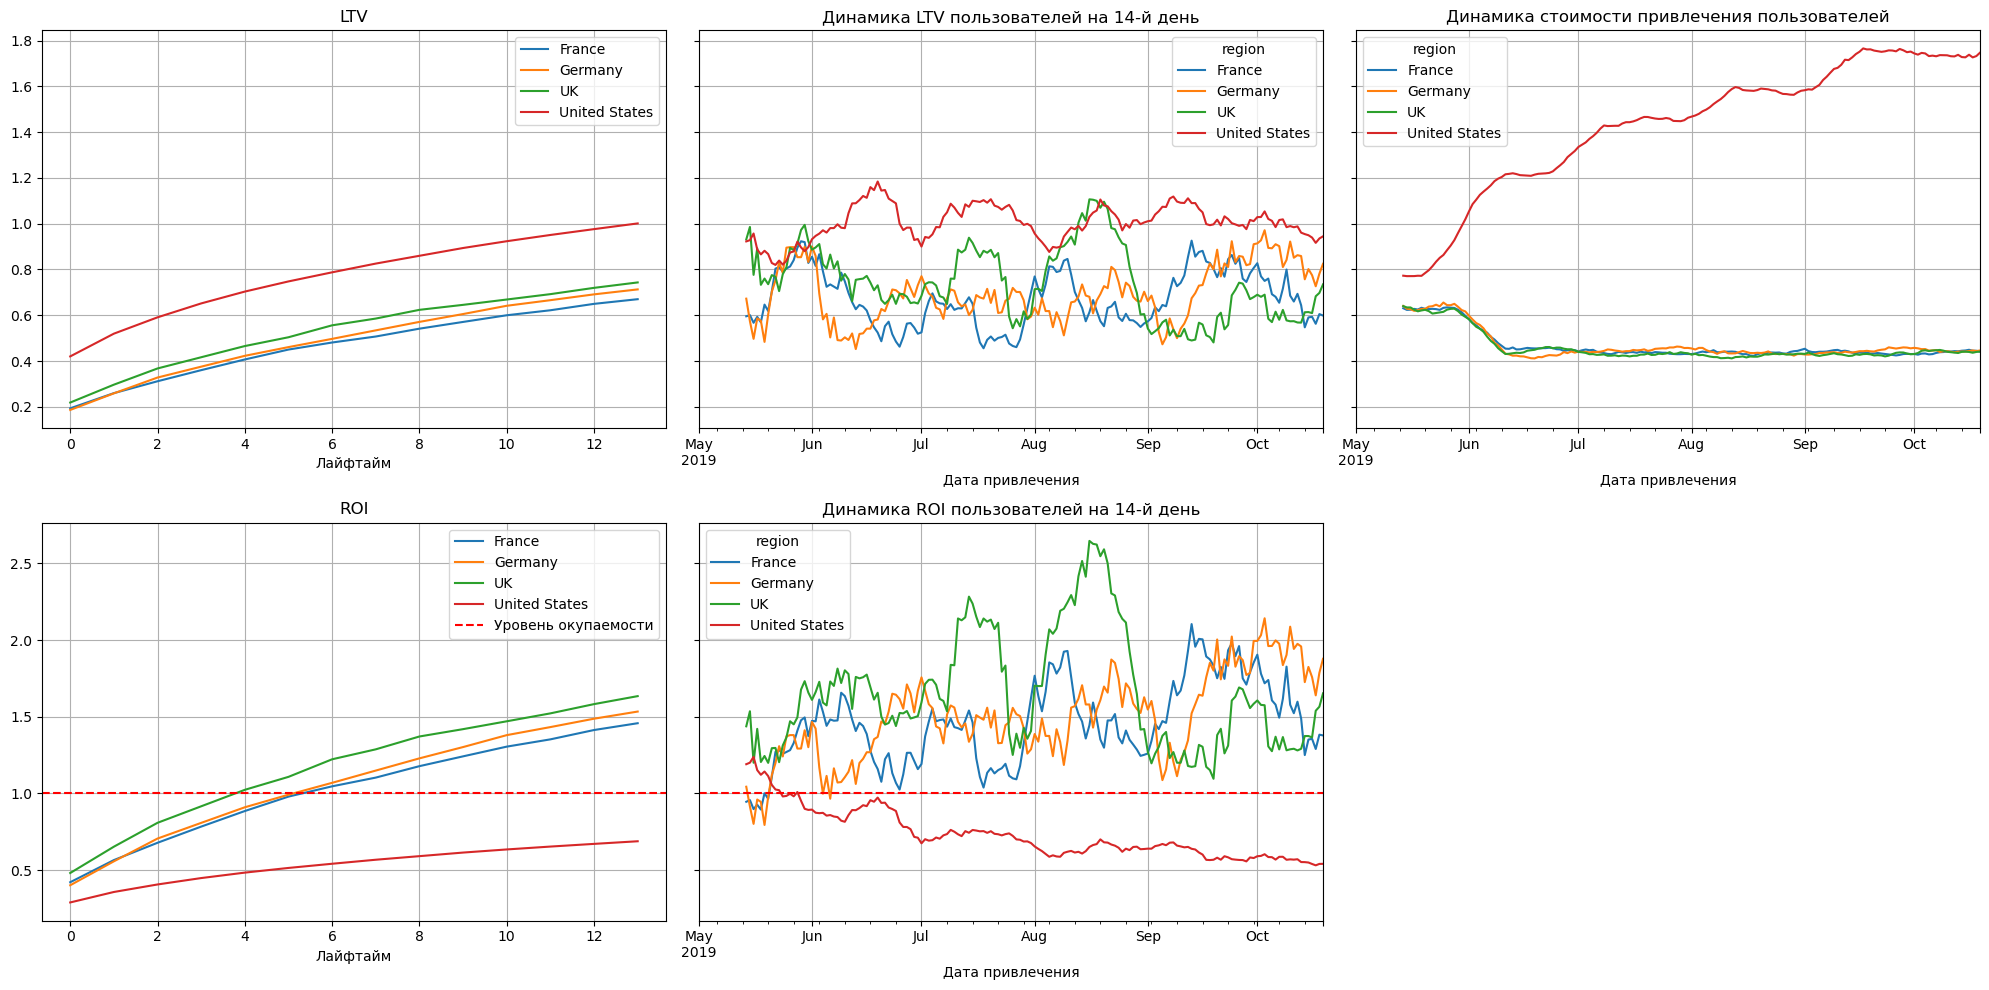

In [39]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=['region']
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Как видно из графиков, стоимость превлечения пользователей из США намного выше, чем остальных, но при этом пользователи из этого региона абсолютно не окупаются. Судя по динамике САС и ROI в июне, после резкого удорожания привлечения пользователей показатель ROI начал падать.

**Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI**

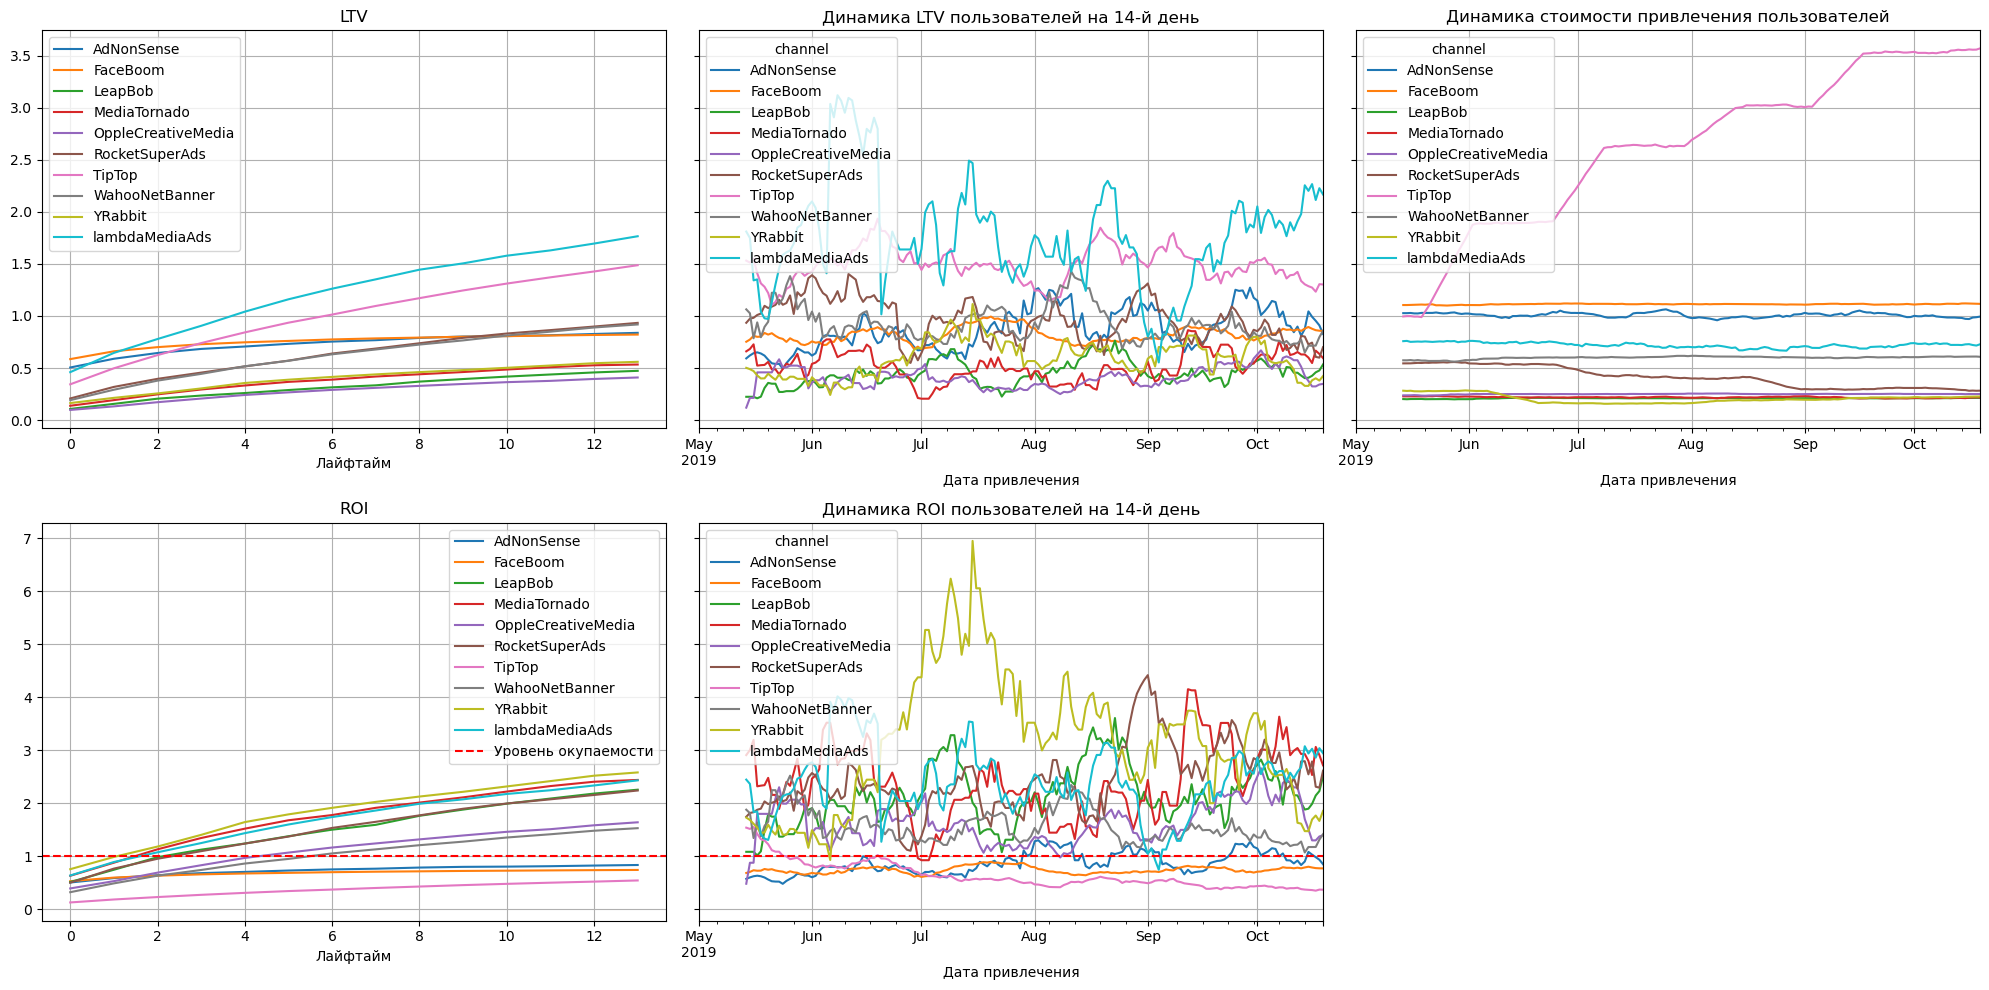

In [40]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=['channel']
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Несмотря на постоянное увеличение расходов на канал привлечения TipTop, самую высокую "пожизненную" ценность привлеченных пользователей показывает lambdaMediaAds. При этом затратный TipTop не окупается и имеет наихудший показатель ROI. В летние месяцы наблюдается возрастание ROI у канала Yrabbit.

**ВЫВОД:** в целом можно сказать, что реклама не окупается. Следует обратить внимание на канал привлечения TipTop т.к. в него идут самые большие инвестиции, но ROI находится на низком уровне, а так же растет САС, что негативно влияет на бизнес. Рекламный канал lambdaMediaAds наоборот, кажется недооцененным. Необходимо дополнительно исследовать конверсию и удержание пользователей из США, т.к. такие пользователи единственные из всех регионов не окупаются. А также дополнительно проверить конверсию по устройствам и каналам и удержание по устройствам.  

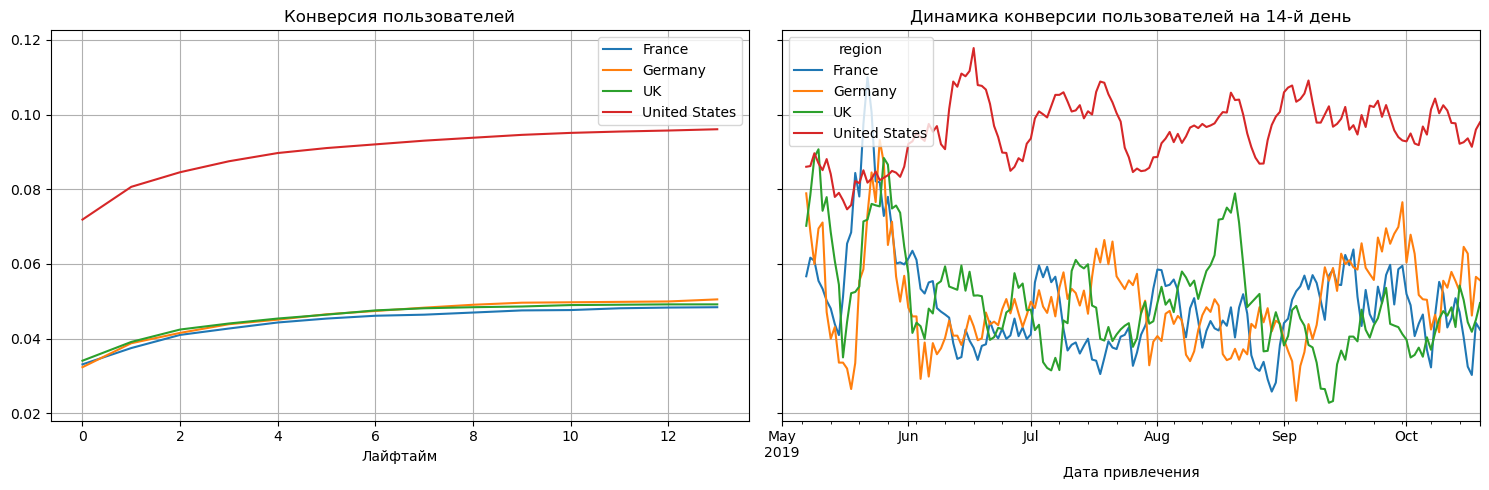

In [41]:
# Проверим конверсию пользователей из США
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=['region']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

С конверсией всё в порядке.

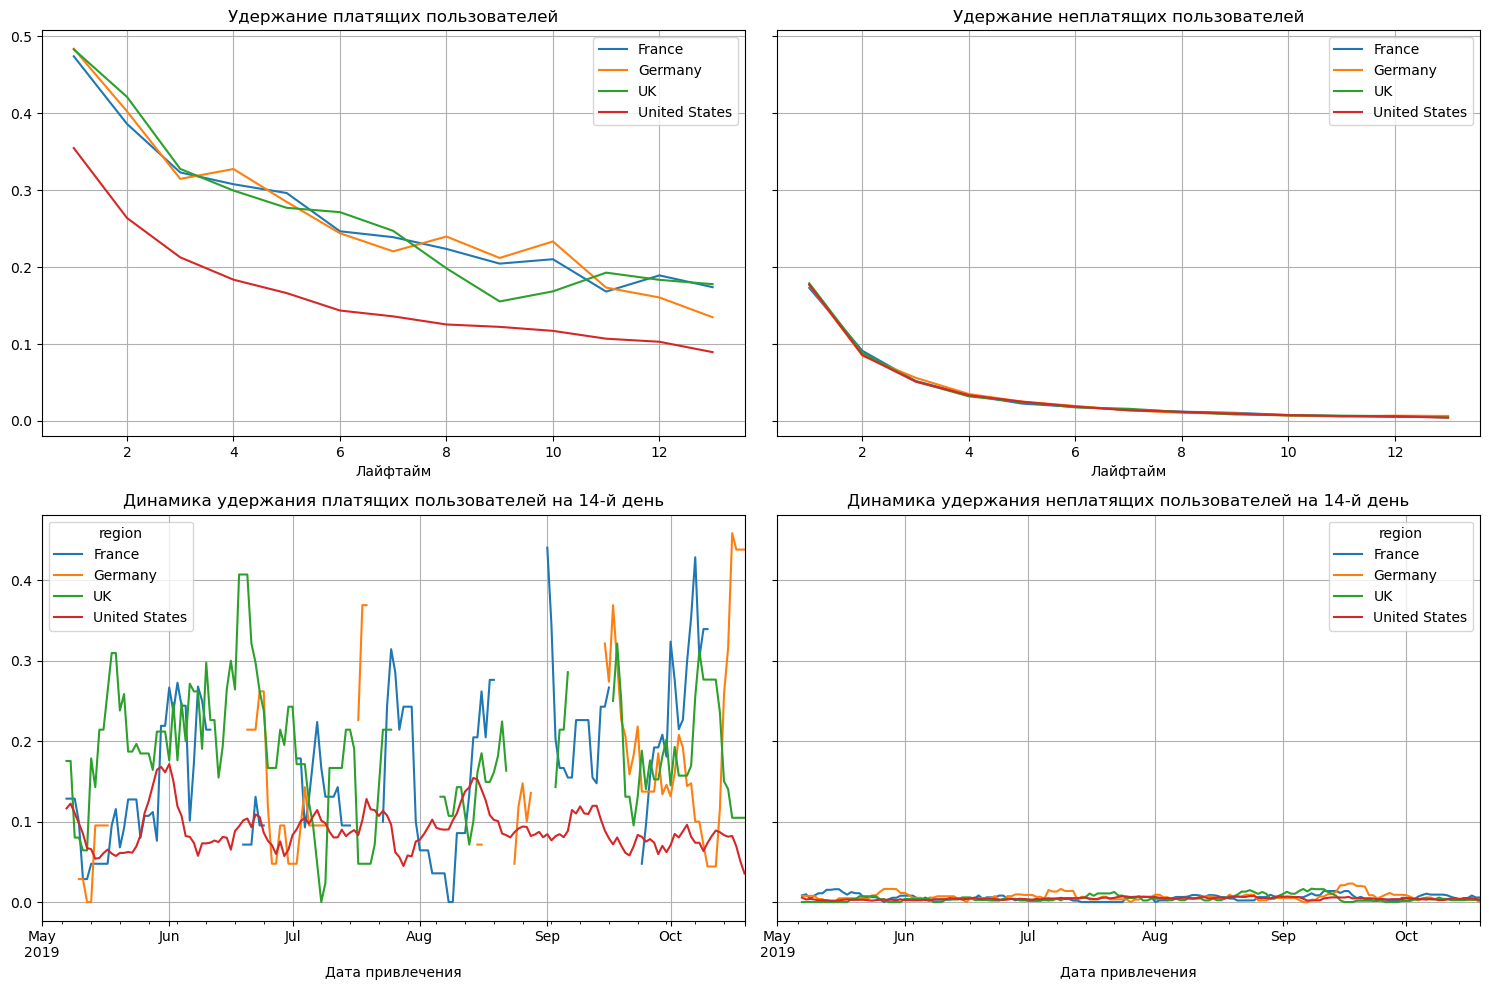

In [42]:
# Проверим удержание пользователей из США
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic, visits, observation_date, horizon_days, dimensions=['region']
)
plot_retention(retention_grouped, retention_history, horizon_days) 

Платящие пользователи из США удерживаются намного хуже остальных, поэтому высокие затраты на рекламу там не окупаются. 

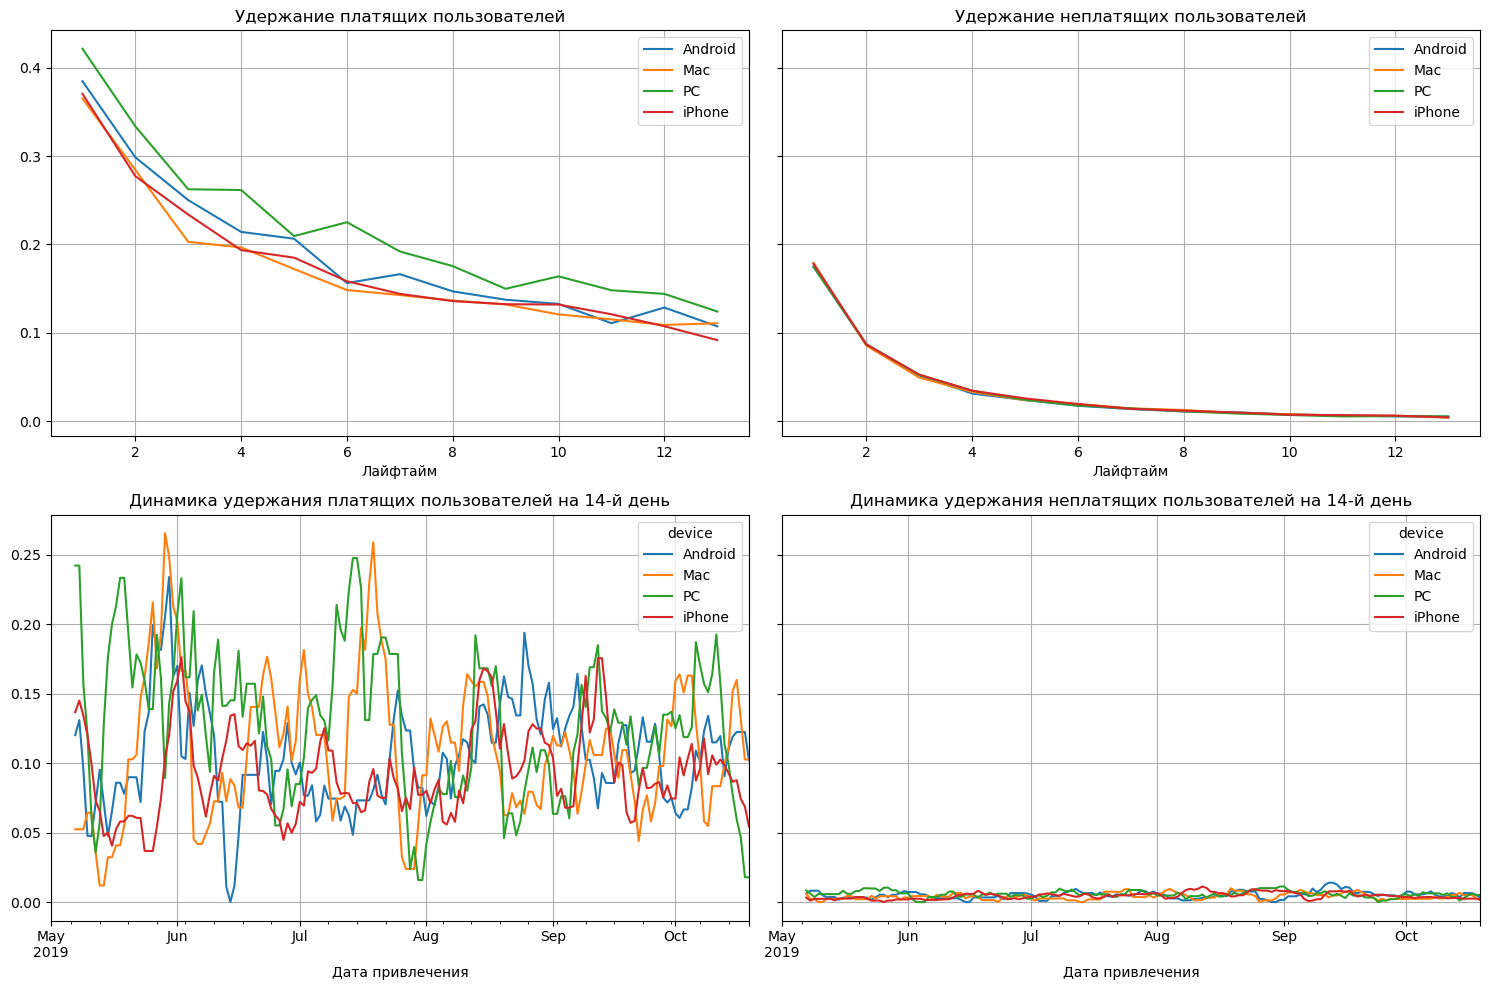

In [43]:
# Проверим удержание пользователей по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic, visits, observation_date, horizon_days, dimensions=['device']
)
plot_retention(retention_grouped, retention_history, horizon_days)

Из графиков видно, что лучше всего удерживаются пользователи PC.

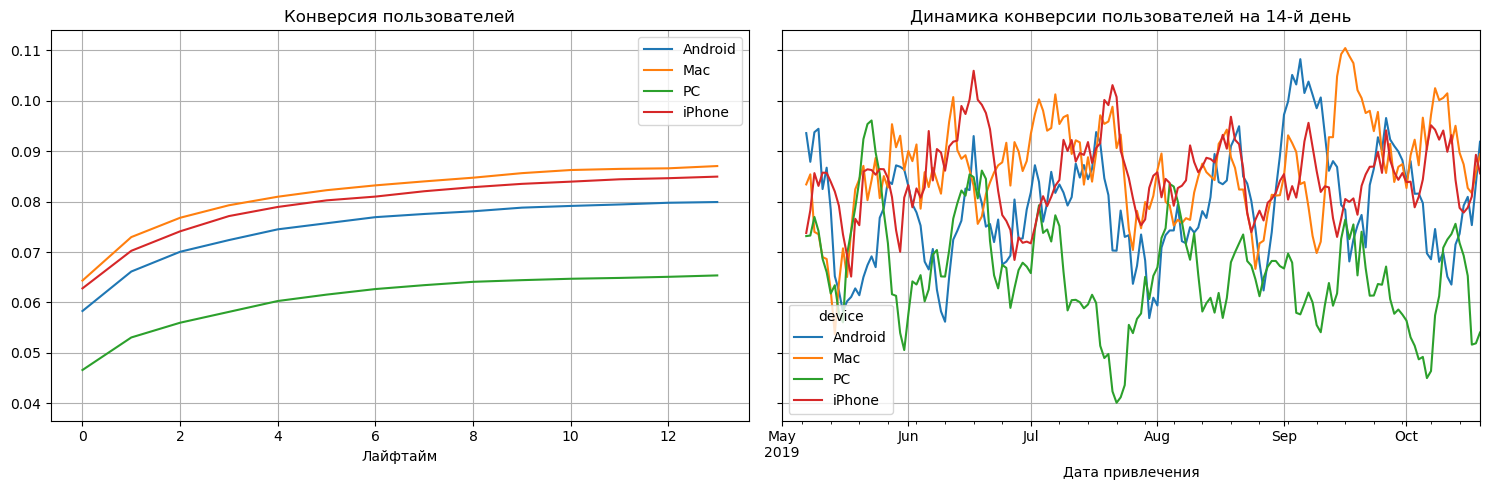

In [44]:
# Проверим конверсию пользователей по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=['device']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Как видно, пользователи PC имеют самую низкую конверсию.

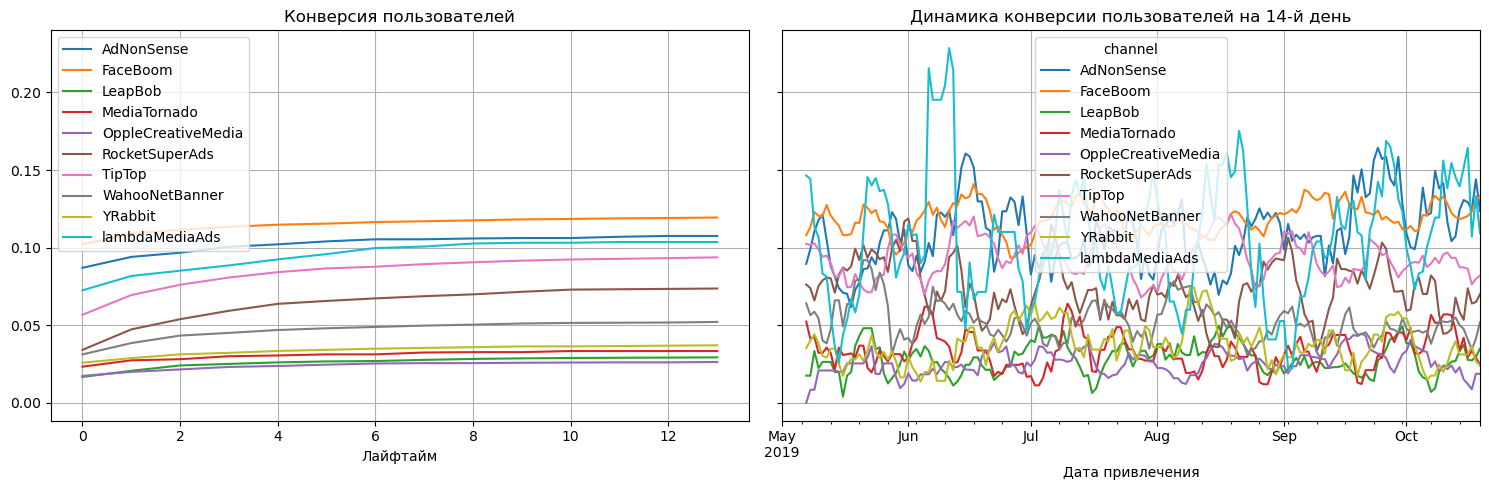

In [45]:
# Проверим конверсию пользователей по каналам привлечения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic, orders, observation_date, horizon_days, dimensions=['channel']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Пользователи, пришедшие из FaceBoom имеют самую лучшую конверсию. Также конверсию выше 10% показывают каналы AdNonSense и lambdaMediaAds.

## Общие выводы

Можно выделить три основные причины неэффективного привлечения пользователей - это низкое удержание платящих пользователей из США и низкая окупаемость рекламных каналов TipTop и FaceBoom в связи с большими расходами, а также плохая окупаемость пользователей Android, iPhone, Mac. При этом пользователи из США имеют самые высокие показатели LTV и конверсию.\
Следует уменьшить затраты на рекламу в США, а также рассмотреть возможности повышения удержания пользователей из этого региона.  Уменьшить расходы на рекламу в каналах TipTop, так как эти пользователи плохо удерживаются. Также следует обратить внимание на пользователей PC, т.к. они единственные окупаются. Также стоит увеличить рекламный бюджет для каналов Yrabbit и lambdaMediaAds.  